In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from sklearn.datasets import load_diabetes

In [35]:
df = load_diabetes()

In [36]:
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [37]:
df_diabetes=pd.DataFrame(df.data,columns=['age',
  'sex',
  'bmi',
  'bp',
  's1',
  's2',
  's3',
  's4',
  's5',
  's6'])
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [38]:
X = df_diabetes

In [39]:
y=df['target']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [42]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

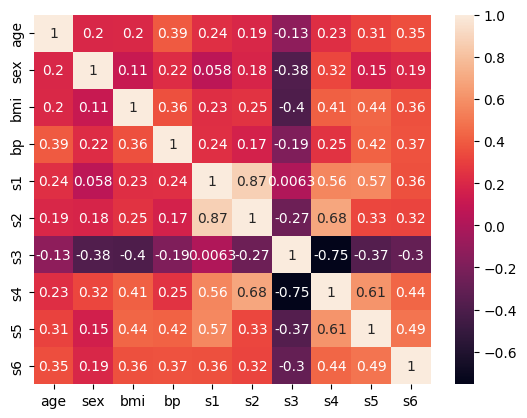

In [43]:
plt.Figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [44]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [45]:
#Hyperparametertuing

In [46]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [47]:

from sklearn.model_selection import GridSearchCV

In [48]:
regressor =DecisionTreeRegressor()

In [49]:
grid = GridSearchCV(regressor,param_grid= param,cv=5,scoring='neg_mean_squared_error')

In [50]:
grid.fit(X_train,y_train)

c:\Users\yashs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\yashs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\yashs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\yashs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [51]:
grid.best_params_

{'criterion': 'absolute_error',
 'max_depth': 2,
 'max_features': 'log2',
 'splitter': 'best'}

In [52]:
## predictions
y_pred=grid.predict(X_test)

In [53]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [54]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.26966501901444373
54.70676691729323
4621.31954887218


In [55]:
selectedmodel=DecisionTreeRegressor(criterion='absolute_error',max_depth=5,max_features='sqrt',splitter='random')

In [56]:
selectedmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      max_features='sqrt', splitter='random')

[Text(0.5055555555555555, 0.9166666666666666, 'x[8] <= -0.066\nabsolute_error = 63.683\nsamples = 309\nvalue = 140.0'),
 Text(0.24444444444444444, 0.75, 'x[1] <= 0.006\nabsolute_error = 40.364\nsamples = 22\nvalue = 87.5'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.1, 0.5833333333333334, 'x[2] <= -0.079\nabsolute_error = 43.769\nsamples = 13\nvalue = 128.0'),
 Text(0.044444444444444446, 0.4166666666666667, 'x[3] <= -0.04\nabsolute_error = 2.5\nsamples = 2\nvalue = 87.5'),
 Text(0.022222222222222223, 0.25, 'absolute_error = 0.0\nsamples = 1\nvalue = 85.0'),
 Text(0.06666666666666667, 0.25, 'absolute_error = 0.0\nsamples = 1\nvalue = 90.0'),
 Text(0.15555555555555556, 0.4166666666666667, 'x[5] <= 0.01\nabsolute_error = 43.091\nsamples = 11\nvalue = 142.0'),
 Text(0.1111111111111111, 0.25, 'x[5] <= -0.047\nabsolute_error = 39.333\nsamples = 9\nvalue = 143.0'),
 Text(0.08888888888888889, 0.08333333333333333, 'absolute_error = 46.667\nsamples = 3\nvalue = 143.0'),
 Text(0.13333333

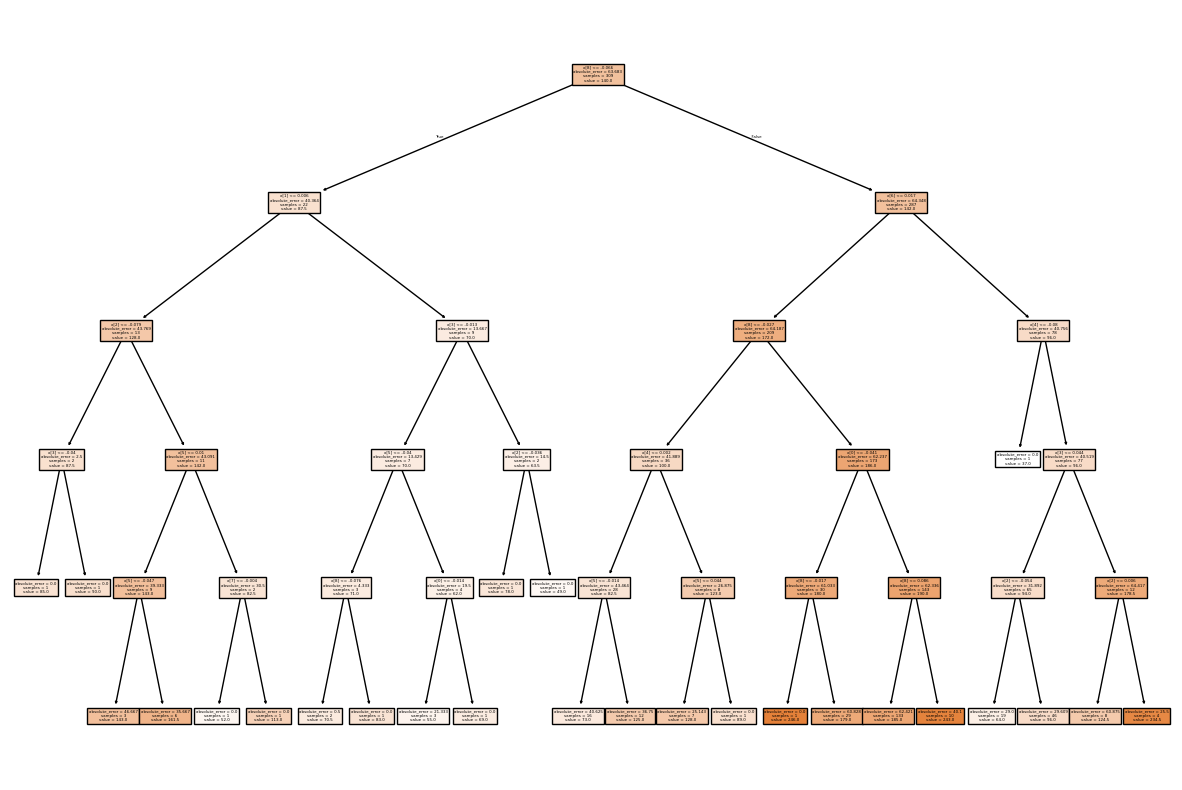

In [57]:
##Visualize the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectedmodel,filled=True)